In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
SVC(probability=True)
from sklearn.tree import DecisionTreeClassifier
import math
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
dataset = pd.read_csv('creditcard.csv')


In [3]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
dataset.isnull().values.any()

False

Text(0, 0.5, 'No of occurences')

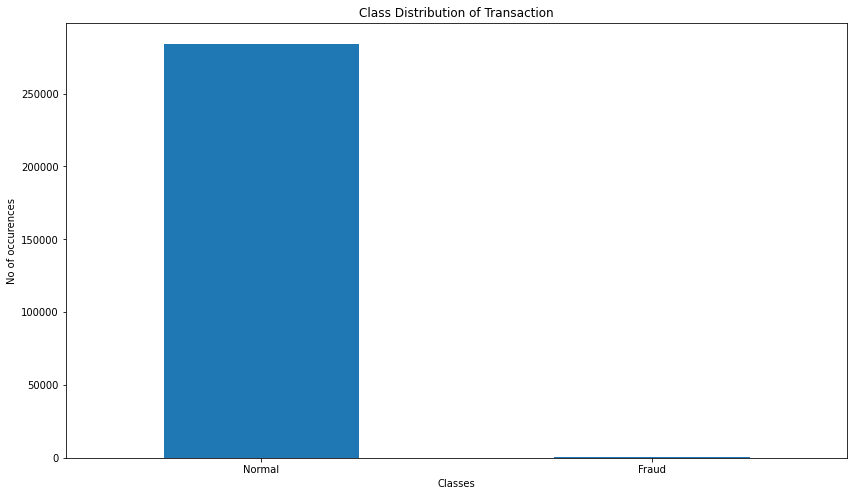

In [6]:
set_class = pd.value_counts(dataset['Class'], sort = True)

set_class.plot(kind = 'bar', rot=0)

plt.title("Class Distribution of Transaction")

plt.xticks(range(2), LABELS)

plt.xlabel("Classes")

plt.ylabel("No of occurences")

In [7]:
fraud_class = dataset[dataset['Class']==1]

normal_class = dataset[dataset['Class']==0]

outlier_fraction = len(fraud_class)/float(len(normal_class))

In [8]:
print(fraud_class.shape,normal_class.shape)

(492, 31) (284315, 31)


In [9]:
#undersampled_data = pd.concat([normal_class.sample(frac = (len(fraud_class)/len(normal_class))), fraud_class.sample(frac=1)],axis=0)
#x = pd.DataFrame(undersampled_data.iloc[:,undersampled_data.columns!='Class'])
#y = undersampled_data.iloc[:,undersampled_data.columns == 'Class']

x = dataset.iloc[: , 1:30].values
y = dataset.iloc[:, 30].values

In [10]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x["scaled_Amount"]=  sc.fit_transform(x.iloc[:,29].values.reshape(-1,1))

#'''Dropping Time and Old amount'''
#x= x.drop(["Time","Amount"], axis= 1)

print("Input Range : ", x.shape)
print("Output Range : ", y.shape)

Input Range :  (284807, 29)
Output Range :  (284807,)


In [11]:
fraud_class.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
normal_class.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

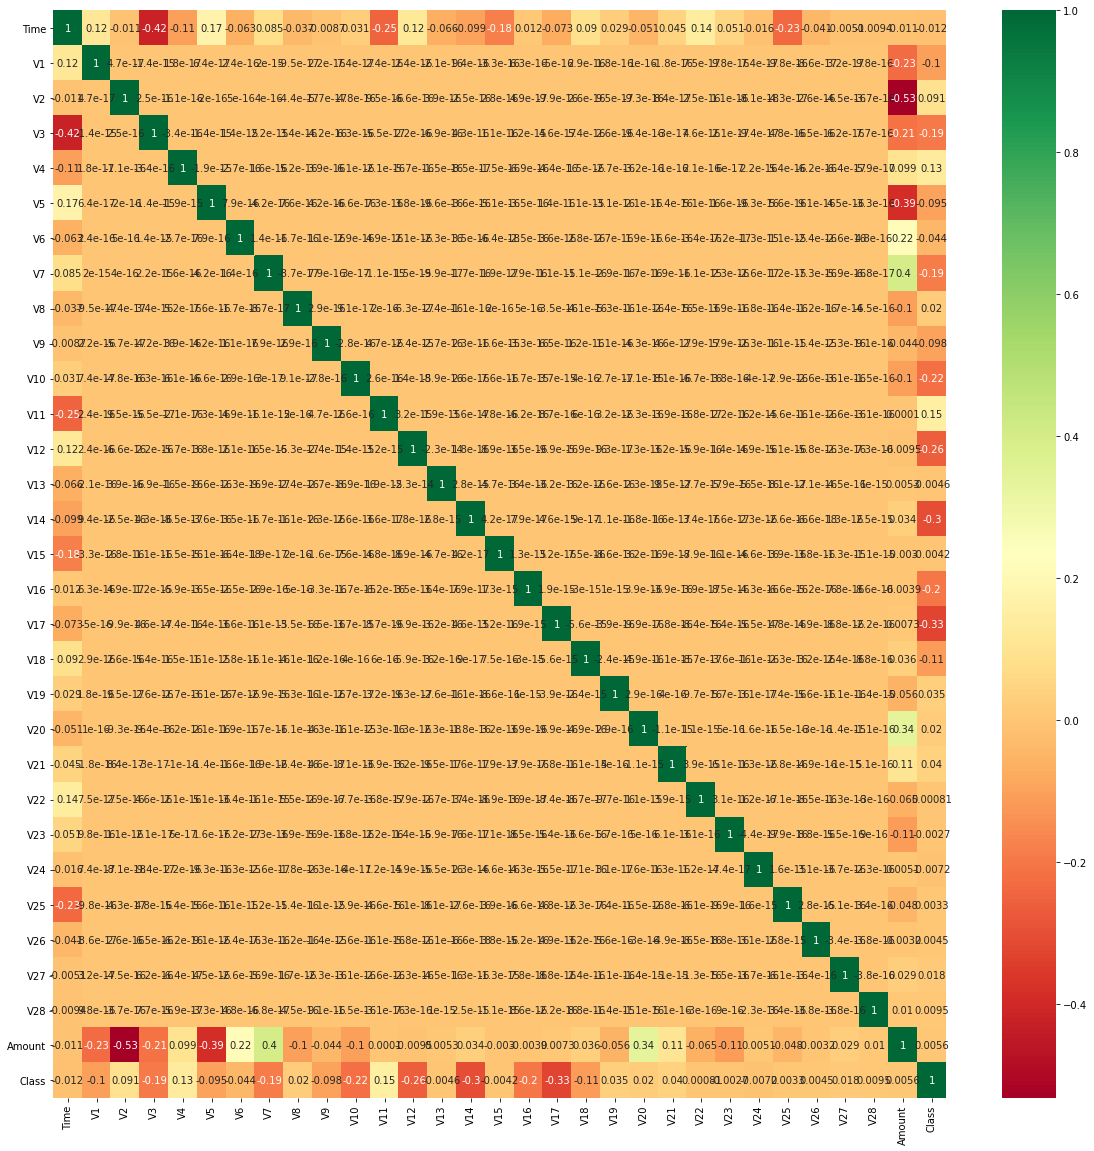

In [13]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [14]:
print(x,y)


[[-1.35980713e+00 -7.27811733e-02  2.53634674e+00 ...  1.33558377e-01
  -2.10530535e-02  1.49620000e+02]
 [ 1.19185711e+00  2.66150712e-01  1.66480113e-01 ... -8.98309914e-03
   1.47241692e-02  2.69000000e+00]
 [-1.35835406e+00 -1.34016307e+00  1.77320934e+00 ... -5.53527940e-02
  -5.97518406e-02  3.78660000e+02]
 ...
 [ 1.91956501e+00 -3.01253846e-01 -3.24963981e+00 ...  4.45477214e-03
  -2.65608286e-02  6.78800000e+01]
 [-2.40440050e-01  5.30482513e-01  7.02510230e-01 ...  1.08820735e-01
   1.04532821e-01  1.00000000e+01]
 [-5.33412522e-01 -1.89733337e-01  7.03337367e-01 ... -2.41530880e-03
   1.36489143e-02  2.17000000e+02]] [0 0 0 ... 0 0 0]


In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state = 42)

In [16]:
print("xtrain.shape : ", xtrain.shape)
print("xtest.shape  : ", xtest.shape)
print("ytrain.shape : ", ytrain.shape)
print("ytest.shape  : ", ytest.shape)

xtrain.shape :  (227845, 29)
xtest.shape  :  (56962, 29)
ytrain.shape :  (227845,)
ytest.shape  :  (56962,)


In [17]:
stdsc = StandardScaler()
xtrain = stdsc.fit_transform(xtrain)
xtest = stdsc.transform(xtest)

In [18]:
print("Training Set after Standardised : \n", xtrain[0])

Training Set after Standardised : 
 [ 0.99785119 -0.22962626 -0.20738468  0.23421529 -0.36779128 -0.0640219
 -0.50588871  0.03060393  0.95995457 -0.02686352  0.61149957  1.68999033
  1.26149805 -0.26397318 -0.36292946  0.34942719 -1.09376318  0.77802759
  0.20615616 -0.1625072   0.32483903  1.3366986   0.08456891 -0.45980186
 -0.08436785 -0.44894226  0.11248883 -0.14374055 -0.30788875]


In [19]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [20]:
y_pred = knn.predict(xtest)


In [21]:
cm1 = confusion_matrix(ytest,y_pred)
print("Confusion Matrix : \n\n", cm1)

Confusion Matrix : 

 [[56859     5]
 [   20    78]]


In [31]:
from sklearn.metrics import  f1_score
print("The accuracy is "+str((cm1[1,1]+cm1[0,0])/(cm1[0,0] + cm1[0,1]+cm1[1,0] + cm1[1,1])*100) + " %")
print("The recall is "+ str(cm1[1,1]/(cm1[1,0] + cm1[1,1])*100) +" %")
print("The precision is "+ str(cm1[1,1]/(cm1[0,1] + cm1[1,1])*100) +" %")
print('F1 score:', f1_score(ytest,y_pred))

The accuracy is 99.95611109160492 %
The recall is 79.59183673469387 %
The precision is 93.97590361445783 %
F1 score: 0.8618784530386742


In [32]:
from sklearn.metrics import roc_auc_score
k_probs = knn.predict_proba(xtest)
k_probs = k_probs[:, 1]
auc = roc_auc_score(ytest,k_probs)

print(' : %.3f' % auc)

 : 0.939


In [33]:
Accuracy_Model = ((cm1[0][0] + cm1[1][1]) / cm1.sum()) *100
print("Accuracy_knn    : ", Accuracy_Model)

Error_rate_Model = ((cm1[0][1] + cm1[1][0]) / cm1.sum()) *100
print("Error_rate_knn  : ", Error_rate_Model)

# True Fake Rate
Specificity_Model= (cm1[1][1] / (cm1[1][1] + cm1[0][1])) *100
print("Specificity_knn : ", Specificity_Model)
# True Genuine Rate
Sensitivity_Model= (cm1[0][0] / (cm1[0][0] + cm1[1][0])) *100
print("Sensitivity_knn : ", Sensitivity_Model)

Accuracy_knn    :  99.95611109160492
Error_rate_knn  :  0.0438889083950704
Specificity_knn :  93.97590361445783
Sensitivity_knn :  99.9648376377925


In [34]:
from sklearn.calibration import CalibratedClassifierCV
svm = SVC(C= 10, kernel= 'rbf', random_state= 0)
svc_classifier = CalibratedClassifierCV(svm)
svc_classifier.fit(xtrain, ytrain)

CalibratedClassifierCV(base_estimator=SVC(C=10, random_state=0))

In [35]:
y_pred2 = svc_classifier.predict(xtest)

In [36]:
cm = confusion_matrix(ytest, y_pred2)
print("Confusion Matrix : \n\n", cm)

Confusion Matrix : 

 [[56861     3]
 [   30    68]]


In [38]:
from sklearn.metrics import  f1_score
print("The accuracy is "+str((cm[1,1]+cm[0,0])/(cm[0,0] + cm[0,1]+cm[1,0] + cm[1,1])*100) + " %")
print("The recall is "+ str(cm[1,1]/(cm[1,0] + cm[1,1])*100) +" %")
print("The precision is "+ str(cm[1,1]/(cm[0,1] + cm[1,1])*100) +" %")
print('F1 score:', f1_score(ytest,y_pred2))


The accuracy is 99.9420666409185 %
The recall is 69.38775510204081 %
The precision is 95.77464788732394 %
F1 score: 0.8047337278106508


In [39]:
from sklearn.metrics import roc_auc_score
svc_probs = svc_classifier.predict_proba(xtest)
svc_probs = svc_probs[:, 1]
auc = roc_auc_score(ytest,svc_probs)
print('AUC: %.3f' % auc)

AUC: 0.972


In [40]:
Error_rate_Model = ((cm[0][1] + cm[1][0]) / cm.sum()) *100
print("Error_rate_svc  : ", Error_rate_Model)

# True Fake Rate
Specificity_Model= (cm[1][1] / (cm[1][1] + cm[0][1])) *100
print("Specificity_svc : ", Specificity_Model)

# True Genuine Rate
Sensitivity_Model= (cm[0][0] / (cm[0][0] + cm[1][0])) *100
print("Sensitivity_svc : ", Sensitivity_Model)

Error_rate_svc  :  0.05793335908149292
Specificity_svc :  95.77464788732394
Sensitivity_svc :  99.94726758186708


In [41]:
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [42]:
y_pred3 = dt_classifier.predict(xtest)

In [43]:
cm3 = confusion_matrix(ytest, y_pred3)
print("Confusion Matrix : \n\n", cm3)

Confusion Matrix : 

 [[56842    22]
 [   20    78]]


In [45]:
from sklearn.metrics import  f1_score 
print("The accuracy is "+str((cm3[1,1]+cm3[0,0])/(cm3[0,0] + cm3[0,1]+cm3[1,0] + cm3[1,1])*100) + " %")
print("The recall is "+ str(cm3[1,1]/(cm3[1,0] + cm3[1,1])*100) +" %")
print("The precision is "+ str(cm3[1,1]/(cm3[0,1] + cm3[1,1])*100) +" %")
print('F1 score:', f1_score(ytest,y_pred3))

The accuracy is 99.92626663389628 %
The recall is 79.59183673469387 %
The precision is 78.0 %
F1 score: 0.7878787878787878


In [46]:
Error_rate_Model = ((cm3[0][1] + cm3[1][0]) / cm3.sum()) *100
print("Error_rate_rf  : ", Error_rate_Model)

# True Fake Rate
Specificity_Model= (cm3[1][1] / (cm3[1][1] + cm3[0][1])) *100
print("Specificity_rf : ", Specificity_Model)

# True Genuine Rate
Sensitivity_Model= (cm3[0][0] / (cm3[0][0] + cm3[1][0])) *100
print("Sensitivity_rf : ", Sensitivity_Model)

Error_rate_rf  :  0.07373336610371826
Specificity_rf :  78.0
Sensitivity_rf :  99.96482712532095


In [47]:
from sklearn.metrics import roc_auc_score
dt_probs = dt_classifier.predict_proba(xtest)
dt_probs = dt_probs[:, 1]
auc = roc_auc_score(ytest, dt_probs)

print('AUC: %.3f' % auc)

AUC: 0.898


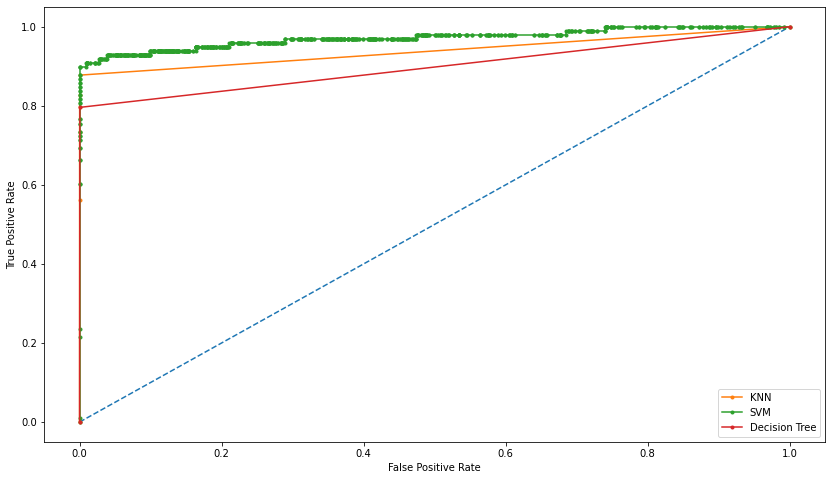

In [48]:
knn_fpr, knn_tpr, _ = roc_curve(ytest, k_probs)
svm_fpr, svm_tpr, _ = roc_curve(ytest, svc_probs)
dt_fpr, dt_tpr, _ = roc_curve(ytest, dt_probs)
# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(knn_fpr, knn_tpr, marker='.',label='KNN')
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM')
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()